<a href="https://colab.research.google.com/github/zuryeong519/Housing-price-prediction/blob/main/%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습목표
- 인공지능 모델을 만들기 전에 과제를 어떻게 정의하는지 알 수 있다.
- 타인의 정의된 과제를 살펴보고 필요한 추가 정보가 무엇인지 생각하는 과정을 이해한다.
- 회귀 예측 문제를 해결하는 인공지능 모델을 만들 수 있다.

# 과제 정의

- (주)마이자산관리는 여러가지 대 고객 서비스 중에 부동산 서비스를 개선하고자 한다.
- 이를 통해 더 많은 고객방문을 유도하고 부동산 자금을 위탁하게 함으로 운용자본을 증가시킬 수 있다고 판단한다.
- 아울러 이러한 운영자본을 바탕으로 수익율을 개선하는 기대효과가 있다고 예상한다.
- 부동산 서비스 개선의 목표는 통계기법의 주택 가격 예측을 인공지능 기반으로 예측하한다.
- 인공지능 기반의 예측은 초기 홍보 효과와 지속적인 높은 정확성으로 기대효과에 부응할 것이다.

# 데이터 세트

- 데이터 세트명 : The Ames Housing dataset
- 데이터 세트 출처 : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

# 데이터 세트 상세 설명

- 데이터는 1460건이며, 총 81개의 컬럼으로 구성됨
- SalePrice 컬럼이 예측을 해야하는 주택가격이다.

- MSSubClass : 건물 클래스
- MSZoning : 일반적인 구역 분류
- LotFrontage : 부동산과 연결된 거리의 선형 피트
- LotArea : 부지 크기(평방피트)
- Street : 도로 접근 유형
- Alley : 골목 접근 방식
- LotShape : 부동산의 일반적인 형태
- LandContour : 대지의 평탄도
- Utilities : 사용 가능한 유틸리티 종류
- LotConfig : 로트 구성
- LandSlope : 토지의 경사
- Neighborhood : Ames 시 경계 내의 물리적 위치
- Condition1 : 주요 도로 또는 철도에 근접함
- Condition1 : 주요 도로 또는 철도에 근접함(두 번째가 있는 경우)
- BldgType : 주거 유형
- HouseStyle : 주거 스타일
- OverallQual : 전체적인 재질 및 마감 품질  
...   
...  
...  
...  

# 모델의 성능 지표 (Metric) : 평균제곱근오차 (RMSE, Root Mean Squared Error)
 - 오차를 제곱함으로 양수와 음수가 될 수 있는 오차를 상쇄하지 않도록 하는 정밀도 계산 방법
 - 오차가 매우 큰 경우(이상치) 지표에 많이 반영되어 민감도가 높아져 모델 학습을 불안하게 만드는 경향이 있다.
 - 이를 개선하기 위하여 제곱근을 취함으로 모델의 학습 안정에 기여한다.

In [ ]:
# 필수 패키지 로드
import gdown
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import lightgbm as lgb

- [설명]
  - 패키지는 import 되는 시점에 일부 메모리를 점유하게 된다.
  - 따라서 사용하지 않는 패키지는 import를 하지 않음으로 메모리를 절약할 수 있다.
  - 다만, 운영환경에서 실제 서비스를 하는 경우가 아닌, 개발하는 과정에서는 필요하지 않은 작업이다.
  - 사용하지 않는 패키지는 전체 프로그램을 코드를 살펴봐야 알 수 있다.
  - 하나씩 검색하여 사용 여부를 확인하는 과정이 필요하다.  

In [ ]:
# 파일 다운로드
google_path = 'https://drive.google.com/uc?id='
file_id = '1oL3KU8zMxI8AfANJSeI-jHCQHZeiJ9mW'
output_name = 'train.csv'
gdown.download(google_path+file_id, output_name)

Downloading...
From: https://drive.google.com/uc?id=1oL3KU8zMxI8AfANJSeI-jHCQHZeiJ9mW
To: /content/train.csv
100%|██████████| 461k/461k [00:00<00:00, 28.4MB/s]


'train.csv'

# 컬럼 제한 : 학습대상 10개 컬럼

In [ ]:
# 파일을 불러오고 10개의 컬럼만 실습대상으로 제한
train = pd.read_csv('train.csv')

print('제한 전 train 데이터 크기 : ', train.shape)

# train = train.iloc[:, [0,1,2,3,4,5,6,7,8,9,-1]]  # 10개 컬럼으로 제한
train = train.iloc[:, [0,1,2,3,4,6,7,8,10,11,12,13,14,15,-1]]  # 컬럼 변경
print('제한 후 train 데이터 크기 : ', train.shape)

train

제한 전 train 데이터 크기 :  (1460, 81)
제한 후 train 데이터 크기 :  (1460, 15)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,SalePrice
0,1,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,208500
1,2,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,181500
2,3,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,223500
3,4,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,140000
4,5,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,NaN,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,175000
1456,1457,20,RL,85.0,13175,NaN,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,210000
1457,1458,70,RL,66.0,9042,NaN,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,266500
1458,1459,20,RL,68.0,9717,NaN,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,142125


- [설명]
  - 학습에 사용하는 컬럼은 데이터 특징으로 사용되며, 데이터 모델에 영향을 주게 된다.
  - 얼마큼의 영향을 주는지, 어떤 컬럼이 영향을 주는지 등은 모델을 만들어봐야 하는 실험이 필요허다.

In [ ]:
# # 학습대상 컬럼을 임의의 6개 컬럼으로 제한하는 방법
# # 단, 어떤 컬럼을 사용할 것인지는 모델링하는 사람이 선택한다.


# 방법1 : 컬럼 번호를 이용하여 사용할 컬럼만 선택하는 방법

# # 전체 데이터 다시 불러오기
# train = pd.read_csv('train.csv')
# print('제한 전 train 데이터 크기 : ', train.shape)

# train = train.iloc[:, [0,3,4,5,7,9,-1]]  # 임의 6개 컬럼으로 제한
# print('제한 후 train 데이터 크기 : ', train.shape)
# display(train)

# print('----------------------------------------------')


# 방법2 : 컬럼명을 이용하여 사용할 컬럼만 선택하는 방법

# # 전체 데이터 다시 불러오기
# train = pd.read_csv('train.csv')
# print('제한 전 train 데이터 크기 : ', train.shape)

# train = train[['BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'SalePrice']] # 임의 6개 컬럼으로 제한
# print('제한 후 train 데이터 크기 : ', train.shape)
# display(train)


In [ ]:
## 상관관계가 낮은 컬럼을 사용하기 위해 상관관계를 확인 (상관도를 확인하는 heatmap 시각화)
# import matplotlib.pyplot as plt
# import seaborn as sns

## 전체 데이터 다시 불러오기
# train = pd.read_csv('train.csv')

## 전처리가 완료되지 않았기 때문에 일단 수치형 컬럼만 선택
# train_num = train.select_dtypes(include=['int64', 'float64'])

## heatmap 시각화만 figure 크기를 (10, 5)로 상관관계 시각화
# fig, ax = plt.subplots(figsize=(10, 5))
# sns.heatmap(train_num.corr(), ax=ax)
# plt.show()

## 상관관계가 -0.2 ~ 0.4 인 컬럼만 선택
# target_columns = train_num.corr()[(train_num.corr()['SalePrice'] > -0.2) & (train_num.corr()['SalePrice'] < 0.4)].index
# print('상관관계가 -0.2 ~ 0.4 인 컬럼 : ', target_columns)

## 전체 데이터 다시 불러오기
# train = pd.read_csv('train.csv')
# print('제한 전 train 데이터 크기 : ', train.shape)

# train = train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'SalePrice']] # 임의 6개 컬럼으로 제한 (마지막 컬럼은 예측해야 하는 대상으로 학습에 사용하지 않음)
# print('제한 후 train 데이터 크기 : ', train.shape)
# display(train)

# 데이터 구조 파악

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1201 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   Alley         91 non-null     object 
 6   LotShape      1460 non-null   object 
 7   LandContour   1460 non-null   object 
 8   LotConfig     1460 non-null   object 
 9   LandSlope     1460 non-null   object 
 10  Neighborhood  1460 non-null   object 
 11  Condition1    1460 non-null   object 
 12  Condition2    1460 non-null   object 
 13  BldgType      1460 non-null   object 
 14  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 171.2+ KB


In [ ]:
# 결측치 확인
train.isnull().sum()[train.isnull().sum() > 0]

,0
LotFrontage,259
Alley,1369


-  결측치를 어떻게 할 것인지 결정
  - Task, Business, Domain 지식에 따라 결정
  - 이러한 지식이 없다면 반복 실험으로 결정

In [ ]:
# 결측치가 1개 이상 있는 컬럼 제거
train_dropna = train.dropna(axis=1)
print('train 데이터 크기 : ', train_dropna.shape)
train_dropna

train 데이터 크기 :  (1460, 13)


,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,SalePrice
0,1,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,208500
1,2,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,181500
2,3,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,223500
3,4,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,140000
4,5,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,175000
1456,1457,20,RL,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,210000
1457,1458,70,RL,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,266500
1458,1459,20,RL,9717,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,142125


- [설명]
  - 결측치 데이터는 삭제할 수 있지만, 수치형의 경우 0으로 치환하여 분석할 수도 있다.

In [ ]:
# train_zero = train.fillna(0)  # 결측치를 0으로 치환
# train_zero.shape # 데이터 갯수와 컬럼 갯수 확인

# # 이후 셀에서 결측치가 0으로 치환된 데이터를 사용하도록 처리
# train_drop = train_zero.copy()  # train_zero 데이터프레임을 복사하여 train_drop 객체에 할당

# 탐색적 자료 분석 (EDA, Exploratory Data Analysis)

In [ ]:
# 각 컬럼의 값 확인
# train_dropna['Id'].value_counts()

In [ ]:
# 각 컬럼의 값 확인
train_dropna['MSSubClass'].value_counts()

,count
MSSubClass,
20,536
60,299
50,144
120,87
30,69
160,63
70,60
80,58
90,52


In [ ]:
# 각 컬럼의 값 확인
train_dropna['MSZoning'].value_counts()

,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10


In [ ]:
# 각 컬럼의 값 확인
train_dropna['LotArea'].value_counts()

,count
LotArea,
7200,25
9600,24
6000,17
9000,14
8400,14
...,...
14601,1
13682,1
4058,1


In [ ]:
# 각 컬럼의 값 확인
# train_dropna['Street'].value_counts()

In [ ]:
# 각 컬럼의 값 확인
train_dropna['LotShape'].value_counts()

,count
LotShape,
Reg,925
IR1,484
IR2,41
IR3,10


In [ ]:
# 각 컬럼의 값 확인
train_dropna['LandContour'].value_counts()

,count
LandContour,
Lvl,1311
Bnk,63
HLS,50
Low,36


In [ ]:
# 각 컬럼의 값 확인
# train_dropna['Utilities'].value_counts()

<Axes: >

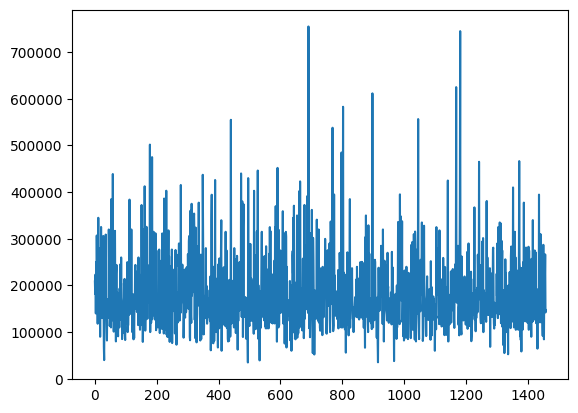

In [ ]:
# SalePrice 시각화
train_dropna['SalePrice'].plot()

# EDA 결과 반영

In [ ]:
# MSZoning 컬럼 수치형으로 변경
le = LabelEncoder()
le.fit(train_dropna['MSZoning'])
train_dropna['MSZoning'] = le.transform(train_dropna['MSZoning'])

# # Street 컬럼 수치형으로 변경
# le = LabelEncoder()
# le.fit(train_dropna['Street'])
# train_dropna['Street'] = le.transform(train_dropna['Street'])

# LotShape 컬럼 수치형으로 변경
le = LabelEncoder()
le.fit(train_dropna['LotShape'])
train_dropna['LotShape'] = le.transform(train_dropna['LotShape'])

# LandContour 컬럼 수치형으로 변경
le = LabelEncoder()
le.fit(train_dropna['LandContour'])
train_dropna['LandContour'] = le.transform(train_dropna['LandContour'])

# # LandContour 컬럼 수치형으로 변경
# le = LabelEncoder()
# le.fit(train_dropna['Utilities'])
# train_dropna['Utilities'] = le.transform(train_dropna['Utilities'])


le = LabelEncoder()
le.fit(train_dropna['LotConfig'])
train_dropna['LotConfig'] = le.transform(train_dropna['LotConfig'])

le = LabelEncoder()
le.fit(train_dropna['LandSlope'])
train_dropna['LandSlope'] = le.transform(train_dropna['LandSlope'])

le = LabelEncoder()
le.fit(train_dropna['Neighborhood'])
train_dropna['Neighborhood'] = le.transform(train_dropna['Neighborhood'])

le = LabelEncoder()
le.fit(train_dropna['Condition1'])
train_dropna['Condition1'] = le.transform(train_dropna['Condition1'])

le = LabelEncoder()
le.fit(train_dropna['Condition2'])
train_dropna['Condition2'] = le.transform(train_dropna['Condition2'])

le = LabelEncoder()
le.fit(train_dropna['BldgType'])
train_dropna['BldgType'] = le.transform(train_dropna['BldgType'])



<ipython-input-59-20148af1efa0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dropna['MSZoning'] = le.transform(train_dropna['MSZoning'])
<ipython-input-59-20148af1efa0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dropna['LotShape'] = le.transform(train_dropna['LotShape'])
<ipython-input-59-20148af1efa0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
# 데이터 구조 확인
train_dropna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            1460 non-null   int64
 1   MSSubClass    1460 non-null   int64
 2   MSZoning      1460 non-null   int64
 3   LotArea       1460 non-null   int64
 4   LotShape      1460 non-null   int64
 5   LandContour   1460 non-null   int64
 6   LotConfig     1460 non-null   int64
 7   LandSlope     1460 non-null   int64
 8   Neighborhood  1460 non-null   int64
 9   Condition1    1460 non-null   int64
 10  Condition2    1460 non-null   int64
 11  BldgType      1460 non-null   int64
 12  SalePrice     1460 non-null   int64
dtypes: int64(13)
memory usage: 148.4 KB


In [ ]:
# 기초통계량 확인
train_dropna.describe()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,10516.828082,1.942466,2.777397,3.019178,0.062329,12.251370,2.031507,2.008219,0.493151,180921.195890
std,421.610009,42.300571,0.632017,9981.264932,1.409156,0.707666,1.622634,0.276232,6.013735,0.868515,0.259040,1.198277,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,3.000000,7553.500000,0.000000,3.000000,2.000000,0.000000,7.000000,2.000000,2.000000,0.000000,129975.000000
50%,730.500000,50.000000,3.000000,9478.500000,3.000000,3.000000,4.000000,0.000000,12.000000,2.000000,2.000000,0.000000,163000.000000
75%,1095.250000,70.000000,3.000000,11601.500000,3.000000,3.000000,4.000000,0.000000,17.000000,2.000000,2.000000,0.000000,214000.000000
max,1460.000000,190.000000,4.000000,215245.000000,3.000000,3.000000,4.000000,2.000000,24.000000,8.000000,7.000000,4.000000,755000.000000


# 학습 데이터, 검증 데이터 분리

In [ ]:
# 총 1460건의 데이터를 1400 : 60 으로 분리하여 1400건으로 학습하고, 60건으로 검증
train_data = train_dropna[:1400]
valid_data = train_dropna[1400:]

train_data.shape, valid_data.shape

((1400, 13), (60, 13))

In [ ]:
# 학습용 데이터 준비
x_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

x_train.shape, y_train.shape

((1400, 12), (1400,))

In [ ]:
# 검증용 데이터 준비
x_valid = valid_data.iloc[:, :-1]
y_valid = valid_data.iloc[:, -1]

x_valid.shape, y_valid.shape

((60, 12), (60,))

# 모델 학습

In [ ]:
params = {
    'n_estimators': 500,
    'learning_rate': 0.01,
    'num_leaves': 30,
    'objective': 'rmse',
    'random_state': 42,
}

model = lgb.LGBMRegressor(**params)
model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 11
[LightGBM] [Info] Start training from score 181085.180714


LGBMRegressor(learning_rate=0.01, n_estimators=500, num_leaves=30,
              objective='rmse', random_state=42)

- [설명]
  - n_estimators : 모델이 생성할 트리의 수이며 적으면 과소적합, 많으면 과대적합이 발생한다.
  - learning_rate : 학습속도를 의미하며 크면 과적합, 작으면 학습이 느리고 과소적합될 수 있다.
  - num_leaves : 트리의 최대 리프(leaf) 수를 지정하는 것으로 크면 과대적합, 작으면 과소적합될 수 있다.
  - random_state : 모델이 생성되면 초기에 필요한 값이 있습니다. 이 값을 고정하는 임의 수치다.

# 모델 예측

In [ ]:
# 예측
valid_data['pred'] = model.predict(x_valid)
valid_data

<ipython-input-66-b918ebfff17a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['pred'] = model.predict(x_valid)


,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,SalePrice,pred
1400,1401,50,4,6000,3,3,0,0,3,2,2,0,120000,134570.689397
1401,1402,60,3,7415,0,3,4,0,8,2,2,0,193000,189872.423922
1402,1403,20,3,6762,3,3,4,0,5,2,2,0,193879,167623.826059
1403,1404,20,3,15256,0,3,1,0,21,6,2,0,282922,301355.597941
1404,1405,50,3,10410,3,3,0,0,17,0,2,0,105000,166214.108949
1405,1406,120,4,3842,0,1,4,1,6,2,2,4,275000,191455.141988
1406,1407,85,3,8445,3,3,0,0,5,2,2,0,133000,178379.316821
1407,1408,20,3,8780,0,3,0,0,11,2,2,0,112000,150646.020913
1408,1409,70,4,7740,3,3,4,0,17,2,2,0,125500,142514.557105
1409,1410,60,3,20544,0,3,1,0,14,2,2,0,215000,261127.002613


# 모델 검증

In [ ]:
# 검증 - 1
score = np.sqrt(np.sum((valid_data['SalePrice'] - valid_data['pred'])**2)/len(valid_data))

print('RMSE = ', score)

RMSE =  38597.372956780746


In [ ]:
# 검증 - 2
score = mean_squared_error(valid_data['SalePrice'], valid_data['pred']) ** 0.5
# score = mean_squared_error(valid_data['SalePrice'], valid_data['pred'], squared=False)

print('RMSE = ', score)

RMSE =  38597.372956780746


In [ ]:
# RMSE =  58791.69911598906


# 사후 분석(설명력) : 변수 중요도

In [ ]:
# 변수 중요도
val_imp = pd.DataFrame(model.feature_importances_, index=model.feature_name_, columns=['imp'])
val_imp

,imp
Id,2655
MSSubClass,1721
MSZoning,275
LotArea,3915
LotShape,598
LandContour,277
LotConfig,534
LandSlope,84
Neighborhood,3898
Condition1,293


<Axes: >

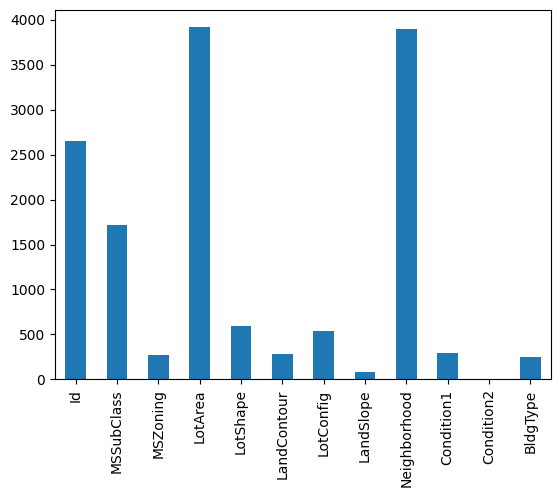

In [ ]:
# 변수 중요도 시각화
val_imp['imp'].plot(kind='bar')

- [설명]
  - 중요도 정보가 데이터 프레임에 있기 때문에 데이터프레임의 정렬 함수를 이용한다.

<Axes: >

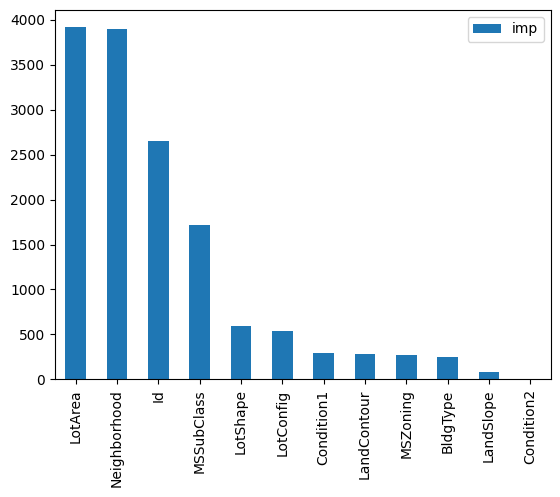

In [ ]:

# 정렬한 결과를 이용하여 plot 생성
val_imp.sort_values(by='imp', ascending=False).plot(kind='bar')

# 모델의 저장과 불러오기

In [ ]:
import pickle

In [ ]:
# 저장 객체 정의
save_object = [model, params, valid_data]

In [ ]:
# 저장
with open(file='my_model.pickle', mode='wb') as f:
    pickle.dump(save_object, f)

In [ ]:
# 저장된 객체 불러오기
with open(file='my_model.pickle', mode='rb') as f:
    load_object = pickle.load(f)

In [ ]:
# 저장된 객체 분리
model = load_object[0]
params = load_object[1]
valid_data = load_object[2]

In [ ]:
# 예측
valid_data['pred'] = model.predict(x_valid)
valid_data


,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,SalePrice,pred
1400,1401,50,4,6000,3,3,0,0,3,2,2,0,120000,134570.689397
1401,1402,60,3,7415,0,3,4,0,8,2,2,0,193000,189872.423922
1402,1403,20,3,6762,3,3,4,0,5,2,2,0,193879,167623.826059
1403,1404,20,3,15256,0,3,1,0,21,6,2,0,282922,301355.597941
1404,1405,50,3,10410,3,3,0,0,17,0,2,0,105000,166214.108949
1405,1406,120,4,3842,0,1,4,1,6,2,2,4,275000,191455.141988
1406,1407,85,3,8445,3,3,0,0,5,2,2,0,133000,178379.316821
1407,1408,20,3,8780,0,3,0,0,11,2,2,0,112000,150646.020913
1408,1409,70,4,7740,3,3,4,0,17,2,2,0,125500,142514.557105
1409,1410,60,3,20544,0,3,1,0,14,2,2,0,215000,261127.002613


In [ ]:
# 검증
score = mean_squared_error(valid_data['SalePrice'], valid_data['pred']) ** 0.5

print('RMSE = ', score)

RMSE =  38597.372956780746


In [ ]:
# RMSE =  58791.69911598906


# [결과]

- 본 프로그램은 Baseline 프로그램으로 입력 값에 따른 주택가격을 예측하는 회귀 문제다.
- 따라서 주택가격 예측을 실제 값과 최대한 근사하게 맞추었다.
- 인공지능 모델의 예측력을 높이기 위한 프로그래밍을 하여 RMSE 값일 낮추었다.
  - 예측력을 높이기 위한 학습방법 예시
    - 변수를 추가하여 학습
    - 변수 중요도에 따라 중요도가 낮은 변수는 제거하고 학습
    - "모델학습" 과정에 있는 params 값의 크기를 조정하여 학습